In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
X = mnist.data

In [5]:
X = X.reshape(70000, 28, 28, 1)

In [6]:
y = np.array(mnist.target)
y=y.astype(int)

In [7]:
#scaler.fit(X)
#scaled = scaler.transform(X)

Mise en place du réseau neuronnal

In [7]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
cnn = cnn_model()
cnn.fit(X, y)

2188/2188 [==============================] - 45s 20ms/step - loss: 26.5280 - accuracy: 0.7744 2s - loss: 27.921 - ETA: 1s 


## Réaliser l'interface graphique

Importer les modules nécéssaires :

In [11]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt

La fonction de prédiction du chiffre :

In [9]:
def predict_digit(img):
    #On Change la taille de l'image à 28x28 pixels
    img = img.resize((28,28))
    #Convertion de l'image en grayscale
    img = img.convert('L')
    img = np.array(img)
    #Puis on normalise l'image et on  l'affiche en console
    img = img*(-1) + 255
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.show()
    #transformation de l'image en array à une dimension pour la prédiction
    img = img.reshape(1, 28, 28, 1)
    #prédiction de la classe
    res = cnn.predict([img])
    res1 = np.argmax(res)
    print(res)
    print(res1)
    return res1

Créer l'interface Tkinter :

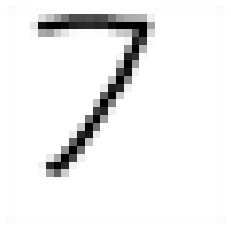

[[1.8889562e-30 1.3609331e-22 1.0000000e+00 4.2387441e-08 0.0000000e+00
  3.7624169e-38 7.6792336e-32 0.0000000e+00 1.7923883e-16 0.0000000e+00]]
2


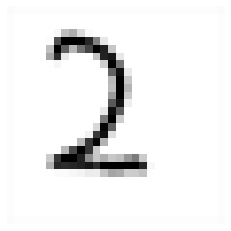

[[0.0000000e+00 6.8686994e-31 1.0000000e+00 3.5774621e-09 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 7.6855892e-33 0.0000000e+00]]
2


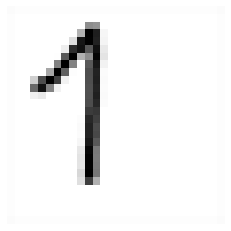

[[0.000000e+00 0.000000e+00 1.000000e+00 6.948713e-38 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
2


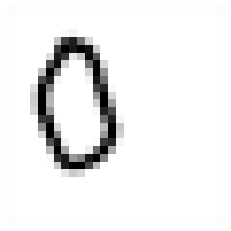

[[2.0879730e-20 7.0186559e-08 9.9932289e-01 1.3172369e-04 4.6304449e-20
  5.4524007e-04 6.0264282e-10 9.2193421e-15 2.4795123e-11 8.9877380e-27]]
2


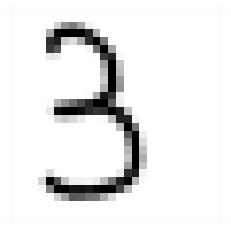

[[0.0000000e+00 0.0000000e+00 8.3174252e-34 1.0000000e+00 0.0000000e+00
  2.4077198e-17 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3301947e-35]]
3


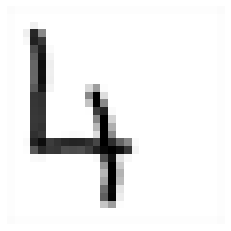

[[1.22232205e-31 3.60878288e-17 3.67288031e-08 9.47753608e-01
  6.98167275e-28 5.22463433e-02 2.61033967e-31 1.04752346e-16
  2.53704853e-13 6.41417055e-15]]
3


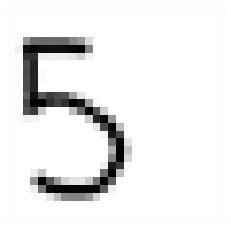

[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  6.584060e-14 0.000000e+00 0.000000e+00 0.000000e+00 2.564545e-28]]
3


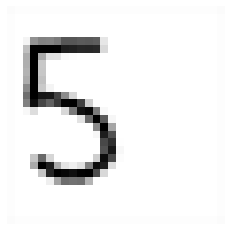

[[0.0000000e+00 0.0000000e+00 3.0018315e-33 1.0000000e+00 0.0000000e+00
  2.8142662e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
3


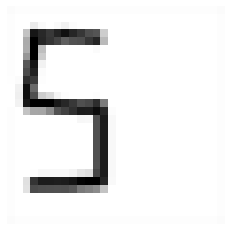

[[0.0000000e+00 0.0000000e+00 1.7224768e-28 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
3


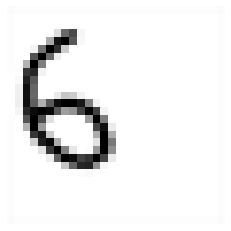

[[0.0000000e+00 0.0000000e+00 7.2968055e-33 1.0000000e+00 0.0000000e+00
  4.5986145e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
3


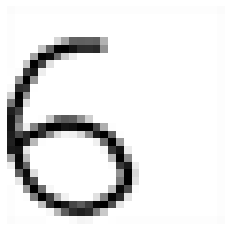

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


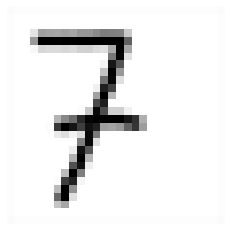

[[0.0000000e+00 5.7673419e-25 3.0996337e-09 1.0000000e+00 0.0000000e+00
  1.5526544e-08 0.0000000e+00 1.2956779e-21 4.6491892e-24 2.0004453e-17]]
3


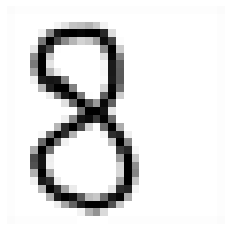

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


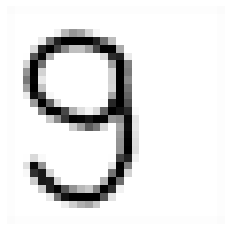

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


In [13]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Créer les éléments
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Dessinez un chiffre à droite...", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Identifier", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Effacer", command = self.clear_all)

        # Créer la grille
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #Associer la fonction de dessin au bouton gauche de la souris
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        #Récupérer les informations de l'image et les convertir
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)

        #Utiliser la fonction de prédiction
        digit = predict_digit(im)
        digit = str(digit)
        self.label.configure(text= str(f"Le chiffre\nest : {digit}."))

    def draw_lines(self, event):
        #Dessiner en créant des ovales noirs de rayon de 8 pixels
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

#Appeler la fonction
App()
mainloop()

Le réseau neuronale fonctionne, cependant il confond la majorité des chiffres avec un 3; je n'ai pas trouvé une solution adéquate pour l'améliorer